In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
%matplotlib inline

covid19 = pd.read_csv('covid-19-all.csv')
state = pd.read_csv('2012_Election_Data-Copy1')

In [2]:
country_names = covid19['Country/Region'].unique()
covid19

Country/Region Province/State   Latitude   Longitude  Confirmed  \
0                    China          Anhui  31.825700  117.226400        1.0   
1                    China        Beijing  40.182400  116.414200       14.0   
2                    China      Chongqing  30.057200  107.874000        6.0   
3                    China         Fujian  26.078900  117.987400        1.0   
4                    China          Gansu  37.809900  101.058300        NaN   
...                    ...            ...        ...         ...        ...   
101763  West Bank and Gaza            NaN  31.952200   35.233200      466.0   
101764      Western Sahara            NaN  24.215500  -12.885800        6.0   
101765               Yemen            NaN  15.552727   48.516388        1.0   
101766              Zambia            NaN -13.133897   27.849332       70.0   
101767            Zimbabwe            NaN -19.015438   29.154857       28.0   

        Recovered  Deaths        Date  
0             NaN     NaN  2020-01-22  
1             NaN     NaN  2020-01-22  
2             NaN     NaN  2020-01-22  
3             NaN     NaN  2020-01-22  
4             NaN     NaN  2020-01-22  
...           ...     ...         ...  
101763       71.0     4.0  2020-04-21  
101764        0.0     0.0  2020-04-21  
101765        0.0     0.0  2020-04-21  
101766       35.0     3.0  2020-04-21  
101767        2.0     3.0  2020-04-21  

[101768 rows x 8 columns]

In [3]:
# Global spread of coronavirus

choro_map=px.choropleth(covid19, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Deaths", 
                    hover_name="Country/Region", 
                    animation_frame="Date"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Covid-19',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = True,
    ))
    
choro_map.show()

In [4]:
#USA choropleth

countries = covid19.loc[covid19['Date'] == '2020-04-21'].sort_values('Confirmed', ascending = False)
us = countries.loc[countries['Country/Region'] == 'US']
usgroup = us.groupby('Province/State').sum().sort_values('Confirmed', ascending = False)
usgroup.drop(['Virgin Islands', 'Guam','Recovered','Northern Mariana Islands','Diamond Princess','Grand Princess','Puerto Rico', 'Federal Bureau of Prisons','US Military','Veteran Hospitals'], axis = 0, inplace = True)
usgroup.sort_values('Province/State', inplace = True)

data = dict(type='choropleth',
            colorscale = 'magma',
            reversescale = True,
            locations = state['State Abv'],
            z = usgroup['Confirmed'],
            locationmode = 'USA-states',
            text = usgroup.index,
            marker = dict(line = dict(color = 'rgb(2,2,2)',width = 1)),
            colorbar = {'title':"Confirmed Cases"}
            )
layout = dict(title = 'Covid19 Cases by 2020-04-21', title_x = 0.5,
              geo = dict(scope='usa',
                         showlakes = True,
                         showcoastlines = True,
                         lakecolor = 'rgb(85,173,240)')
             )
choromap = go.Figure(data = data,layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

In [5]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

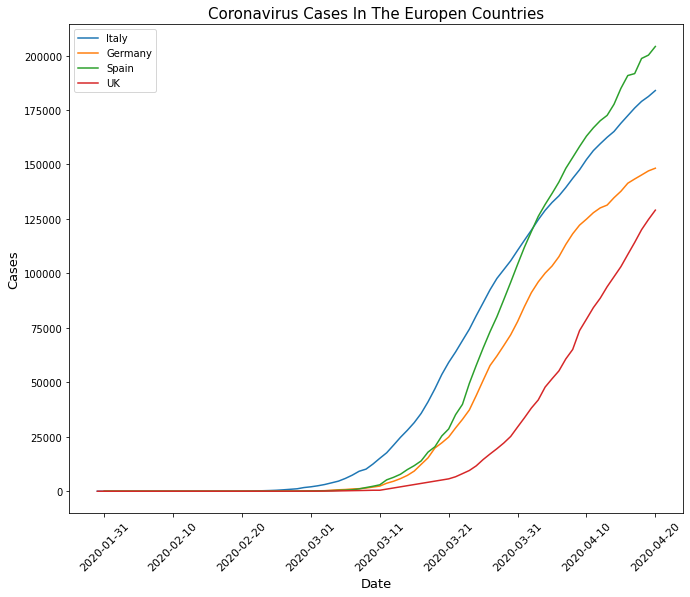

In [6]:
Italy = covid19[covid19['Country/Region'] == 'Italy']
Germany = covid19[covid19['Country/Region'] == 'Germany'][4:]
Spain = covid19[covid19['Country/Region'] == 'Spain']
UK = covid19[covid19['Country/Region'] == 'United Kingdom']
UK['Province/State'].fillna('UK', inplace = True)
UK = UK[UK['Province/State'] == 'UK']

plt.figure(figsize = (11,9))

plt.plot(Italy['Date'], Italy['Confirmed'], label = 'Italy')
plt.plot(Germany['Date'], Germany['Confirmed'], label = 'Germany')
plt.plot(Spain['Date'], Spain['Confirmed'], label = 'Spain')
plt.plot(UK['Date'], UK['Confirmed'], label = 'UK')
plt.xticks(np.arange(1,85,10), ['2020-01-31','2020-02-10', '2020-02-20','2020-03-01', '2020-03-11','2020-03-21', 
                              '2020-03-31', '2020-04-10', '2020-04-20'], size = 11, rotation = 45)
plt.title('Coronavirus Cases In The Europen Countries', fontsize = 15)
plt.xlabel('Date', size = 13)
plt.ylabel('Cases', size = 13)
plt.legend()

In [7]:
# Iplot of Italy

Italy = covid19[covid19['Country/Region'] == 'Italy']
Italy.iplot(kind = 'bar', y = 'Confirmed', x = 'Date', title = 'Covid-19 in Italy', xTitle = 'Date', yTitle = 'Number of cases')

In [8]:
# Processing the dataset

country = covid19[covid19['Date'] == '2020-04-21']
unique_country = country[country.isnull().any(axis = 1)]
unique_country.drop(country.columns[[1,2,3,7]], axis = 1, inplace = True)
unique_country_sorted = unique_country.sort_values('Confirmed', ascending = False)
obj = unique_country_sorted.append({'Country/Region' : 'USA', 'Confirmed' : 823786, 'Recovered' : 75204, 'Deaths' : 44845}, ignore_index = True)
obj = obj.append({'Country/Region' : 'UK', 'Confirmed' : 130132, 'Recovered' : 638, 'Deaths' : 17378}, ignore_index = True)
obj = obj.append({'Country/Region' : 'China', 'Confirmed' : 83853, 'Recovered' : 77799, 'Deaths' : 4636}, ignore_index = True)
obj = obj.append({'Country/Region' : 'Canada', 'Confirmed' : 39402, 'Recovered' : 13188, 'Deaths' : 1909}, ignore_index = True)
obj = obj.append({'Country/Region' : 'Australia', 'Confirmed' : 6547, 'Recovered' : 4124, 'Deaths' : 67}, ignore_index = True)
obj = obj.append({'Country/Region' : 'Netherlands', 'Confirmed' : 34317, 'Recovered' : 74, 'Deaths' : 3929}, ignore_index = True)
obj.drop([4,10], axis = 0, inplace = True)
sorted_by_confirmed = obj.sort_values('Confirmed', ascending = False)

In [9]:
sorted_by_confirmed['Death Rate'] = sorted_by_confirmed['Deaths'] * 100 / sorted_by_confirmed['Confirmed']
sorted_by_confirmed2 = sorted_by_confirmed.style.background_gradient(cmap='Blues')
sorted_by_confirmed2

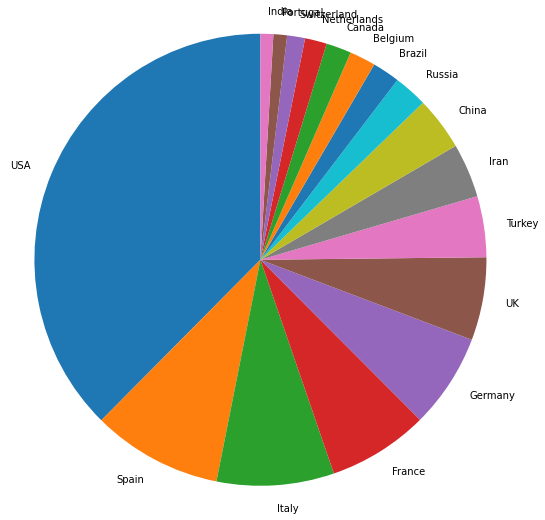

In [10]:
# Pie Chart

fig, ax = plt.subplots(figsize = (9,9))
ax.pie(sorted_by_confirmed['Confirmed'][:17], labels = sorted_by_confirmed['Country/Region'][:17], startangle=90)
ax.axis('equal')
plt.show()

Text(0.5, 1.0, 'Pie Chart of Deaths by 2020-04-21')

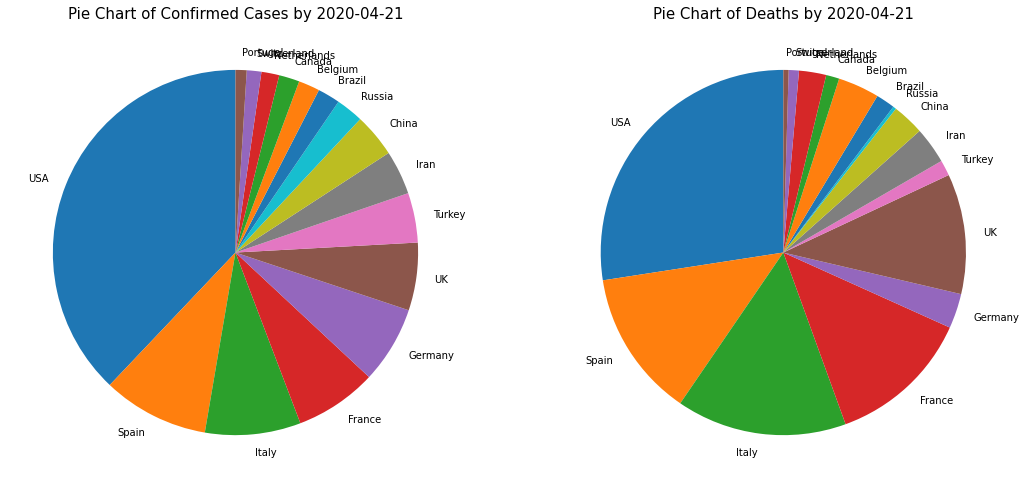

In [11]:
 # Pie chart of Confirmed and Death cases

fig, ax = plt.subplots(1, 2, figsize = (18,18))
ax[0].pie(sorted_by_confirmed['Confirmed'][:16], labels = sorted_by_confirmed['Country/Region'][:16], startangle=90)
ax[1].pie(sorted_by_confirmed['Deaths'][:16], labels = sorted_by_confirmed['Country/Region'][:16], startangle=90)
ax[0].set_title('Pie Chart of Confirmed Cases by 2020-04-21', fontsize = 15)
ax[1].set_title('Pie Chart of Deaths by 2020-04-21', fontsize = 15)
#ax[0].axis('equal')
#ax[1].axis('equal')

In [12]:
# Correlations

corr = sorted_by_confirmed.corr()
corr

Confirmed  Recovered    Deaths  Death Rate
Confirmed    1.000000   0.686551  0.924073    0.149131
Recovered    0.686551   1.000000  0.694037    0.169540
Deaths       0.924073   0.694037  1.000000    0.266823
Death Rate   0.149131   0.169540  0.266823    1.000000

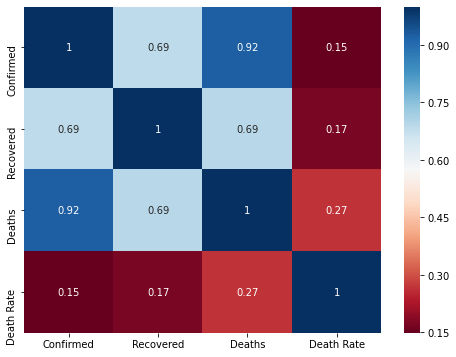

In [13]:
# Heatmap of correlations

plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, cmap = 'RdBu')
#b, t = plt.ylim()
#plt.ylim(b + 0.5, t - 0.5)

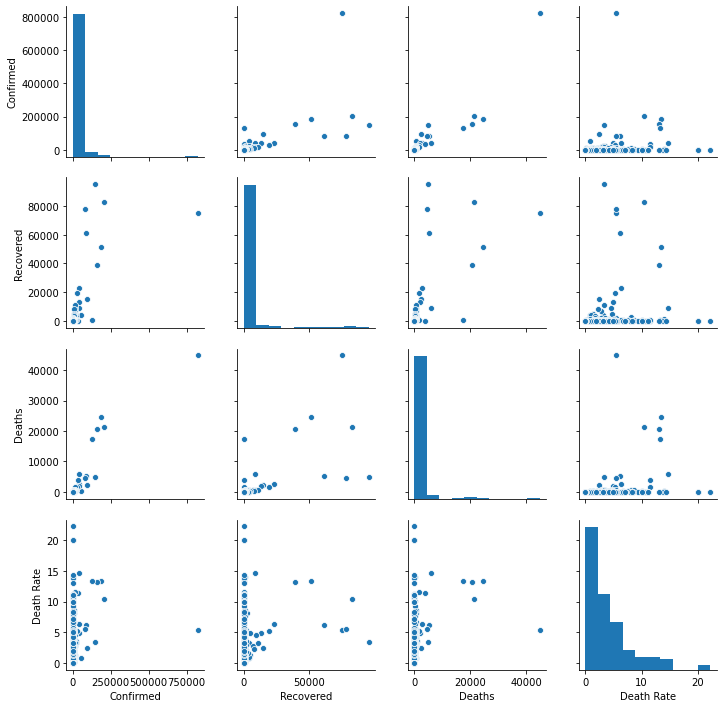

In [14]:
sns.pairplot(sorted_by_confirmed)

In [15]:
# Preprocessing the dataset to creat europe_country dataset

europe = covid19[(covid19['Longitude'] < 35) & (covid19['Longitude'] > -20)
                 & (covid19['Latitude'] > 35) & (covid19['Latitude'] < 70)]
jersey = europe[europe['Country/Region'] == 'Jersey'].index
guer = europe[europe['Country/Region'] == 'Guernsey'].index
channel = europe[europe['Country/Region'] == 'Channel Islands'].index
europe.drop(jersey, inplace = True)
europe.drop(guer, inplace = True)
europe.drop(channel, inplace = True)
europe_country = europe[europe['Date'] == '2020-04-21'].iloc[4:]

In [16]:
# Choropleth of Europe

data = dict(type='choropleth',
            colorscale = 'Magma',
            reversescale = True,
            locations = europe_country['Country/Region'],
            z = europe_country['Confirmed'],
            locationmode = 'country names',
            #text = europe_country['Country/Region'],
            marker = dict(line = dict(color = 'rgb(2,2,2)',width = 1)),
            colorbar = {'title':"Confirmed Cases"}
            )
layout = dict(title = 'Covid19 Cases by 2020-04-21 in Europe', title_x = 0.5,
              geo = dict(scope='europe',
                         showlakes = False,
                         showcoastlines = True,
                         lakecolor = 'rgb(85,173,240)')
             )
choromap = go.Figure(data = data, layout = layout)
plot(choromap,validate = False)

'temp-plot.html'

In [17]:
# Animation

choro_map=px.choropleth(europe,
                    locations="Country/Region", 
                    locationmode = "country names",
                    color = "Confirmed", 
                    hover_name = "Country/Region", 
                    animation_frame = "Date",
                    scope = 'europe'
                   )

choro_map.update_layout(
    title_text = 'Europen Spread of Covid-19',
    title_x = 0.5,
    geo = dict(
        showframe = False,
        showcoastlines = True,
    ))
    
choro_map.show()

In [18]:
# Viz using Plotly.express

fig = px.scatter(sorted_by_confirmed[sorted_by_confirmed.Confirmed > 2500],
                 x = 'Confirmed', y = 'Deaths', color = 'Country/Region', size = 'Recovered', height = 800,
                 text = 'Country/Region',log_x=True,log_y = True)
fig.update_traces(textposition = 'top center')
fig.update_layout(showlegend = False)
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()